In [22]:
import numpy as np
from MOEAD import MOEAD
from Problem import ZDT1, ZDT3

problem = ZDT3()
pop_size = 50
n_gen = 100
n_var = 30
population = [np.random.rand(n_var) for _ in range(pop_size)]

res = MOEAD(pop_size=pop_size)
res.optimize(Problem=problem,
             population=population,
             n_gen=n_gen)

F = res.get_F()
print(F)

[[ 0.8469132  -0.74827338]
 [ 0.8469132  -0.73795389]
 [ 0.8469132  -0.71881834]
 [ 0.8469132  -0.74802268]
 [ 0.8469132  -0.73795389]
 [ 0.8469132  -0.65918676]
 [ 0.8469132  -0.65918676]
 [ 0.8469132  -0.65918676]
 [ 0.8469132  -0.65918676]
 [ 0.8469132  -0.74802268]
 [ 0.82833145 -0.53616973]
 [ 0.82833145 -0.53567811]
 [ 0.82833145 -0.53567811]
 [ 0.82833145 -0.53567811]
 [ 0.64819541 -0.4464585 ]
 [ 0.64819541 -0.4464585 ]
 [ 0.64819541 -0.43541171]
 [ 0.64115799 -0.40994438]
 [ 0.6400996  -0.37689384]
 [ 0.6344202  -0.34876737]
 [ 0.63441889 -0.33436244]
 [ 0.63441889 -0.33436244]
 [ 0.6277984  -0.26621577]
 [ 0.62302924 -0.2004877 ]
 [ 0.62302664 -0.18333579]
 [ 0.45409419 -0.12380292]
 [ 0.45409419 -0.12380292]
 [ 0.45409419 -0.12380292]
 [ 0.45409419 -0.12380292]
 [ 0.4439389  -0.10169218]
 [ 0.43668261 -0.05944598]
 [ 0.43486113 -0.04551712]
 [ 0.424999    0.04800861]
 [ 0.41947112  0.11177968]
 [ 0.41839683  0.14159356]
 [ 0.25759687  0.24218557]
 [ 0.25759687  0.24218557]
 

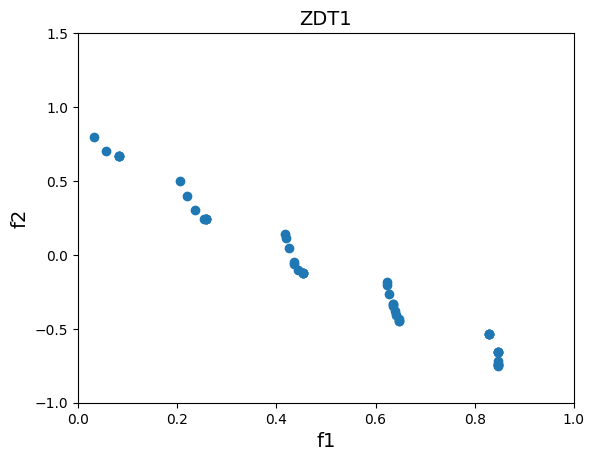

In [23]:
# --- 散布図 ---
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("f1", fontsize=14)
plt.ylabel("f2", fontsize=14)
plt.title("ZDT1", fontsize=14)
plt.xlim(0,1)
plt.ylim(-1,1.5)

#plt.scatter(f_values[:, 0], f_values[:, 1])    # 全解
plt.scatter(F[:, 0], F[:, 1])    # 非劣解